<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau population comporte {} observation(s) ou article(s)".format(population.shape[0]))

Le tableau population comporte 1416 observation(s) ou article(s)


In [4]:
#Consulter le nombre de colonnes
print("Le tableau population comporte {} colonne(s)".format(population.shape[1]))

#La nature des données dans chacune des colonnes
print("La première colonne, nommée {} est de type {}".format(population.columns[0],population.dtypes[population.columns[0]]))
print("La deuxième colonne, nommée {} est de type {}".format(population.columns[1],population.dtypes[population.columns[1]]))
print("La troisième colonne, nommée {} est de type {}".format(population.columns[2],population.dtypes[population.columns[2]]))

#Le nombre de valeurs présentes dans chacune des colonnes
print("La première colonne contient {} valeurs".format(population[population.columns[0]].count()))
print("La deuxième colonne contient {} valeurs".format(population[population.columns[1]].count()))
print("La troisième colonne contient {} valeurs".format(population[population.columns[2]].count()))

Le tableau population comporte 3 colonne(s)
La première colonne, nommée Zone est de type object
La deuxième colonne, nommée Année est de type int64
La troisième colonne, nommée Valeur est de type float64
La première colonne contient 1416 valeurs
La deuxième colonne contient 1416 valeurs
La troisième colonne contient 1416 valeurs


In [5]:
#Affichage les 5 premières lignes de la table
population.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


**Actuellement, les valeurs de population sont exprimées en milliers, cela peut créer une confusion.**<br>
**L'harmonisation permettra de transformer ces valeurs en nombre total d'individus.**



In [6]:
#Nous allons harmoniser les unités. Pour cela, nous allons multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur'] * 1000

In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur': 'Population'}, inplace=True)

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head(5)

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau disponibilité alimentaire comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))

Le tableau disponibilité alimentaire comporte 15605 observation(s) ou article(s)


In [10]:
#Consulter le nombre de colonnes
print("Le tableau disponibilité alimentaire comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau disponibilité alimentaire comporte 18 colonne(s)


In [11]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)

**Conversion des éléments exprimés en milliers de tonnes en KG :**
<br>
Aliments pour animaux, Autre utilisations, Disponibilité intérieure, Exportations - Quantité, Importations - Quantité, Nourriture, Pertes, Production, Semences, Traitement et Variation de stock

In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
# Colonnes à convertir en kilogrammes
colonnes_a_convertir = [
    'Aliments pour animaux', 
    'Autres Utilisations', 
    'Disponibilité intérieure', 
    'Exportations - Quantité', 
    'Importations - Quantité', 
    'Nourriture', 
    'Pertes', 
    'Production', 
    'Semences', 
    'Traitement', 
    'Variation de stock'
]

#On multiplie par 1000 pour convertir en Tonnes puis en Kg
dispo_alimentaire[colonnes_a_convertir] = dispo_alimentaire[colonnes_a_convertir] * 1000 * 1000

In [14]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
print("Le tableau aide alimentaire comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))

Le tableau aide alimentaire comporte 1475 observation(s) ou article(s)


In [16]:
#Consulter le nombre de colonnes
print("Le tableau aide alimentaire comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau aide alimentaire comporte 4 colonne(s)


In [17]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head(5)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)

In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] * 1000

In [20]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head(5)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau sous nutrition comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))

Le tableau sous nutrition comporte 1218 observation(s) ou article(s)


In [22]:
#Consulter le nombre de colonnes
print("Le tableau sous nutrition comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau sous nutrition comporte 3 colonne(s)


In [23]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [24]:
#Conversion de la colonne sous nutrition en numérique
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

In [25]:
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'].fillna(0)

0        8.6
1        8.8
2        8.9
3        9.7
4       10.5
        ... 
1213     0.0
1214     0.0
1215     0.0
1216     0.0
1217     0.0
Name: Valeur, Length: 1218, dtype: float64

In [26]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'}, inplace=True)

In [27]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition'] * 1000000

In [28]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head(5)

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [29]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

# On filtre les données pour l'année 2017 dans le DataFrame population
population_2017 = population[population['Année'] == 2017]

#  On filtre les données pour la période 2016-2018 dans le DataFrame sous_nutrition
sous_nutrition_2017 = sous_nutrition[sous_nutrition['Année'] == '2016-2018']

#On effectue la jointure entre les deux tables via la Zone
population_sous_nutrition=pd.merge(population_2017, sous_nutrition_2017, on='Zone', how='left')

# Vérification du nombre de lignes
nombre_lignes_population = population_2017.shape[0]
nombre_lignes_jointure = population_sous_nutrition.shape[0]

print(f"Nombre de lignes dans le dataset population (2017) : {nombre_lignes_population}")
print(f"Nombre de lignes après la jointure : {nombre_lignes_jointure}")

if nombre_lignes_population == nombre_lignes_jointure:
    print("Le nombre de lignes est identique, la jointure est correcte.")
else:
    print("Il y a une différence dans le nombre de lignes, quelque chose ne va pas.")

Nombre de lignes dans le dataset population (2017) : 236
Nombre de lignes après la jointure : 236
Le nombre de lignes est identique, la jointure est correcte.


In [30]:
# On renomme les colonnes
population_sous_nutrition.rename(columns={'Année_x': 'Année', 'Année_y': 'Période'}, inplace=True)
#Affichage du dataset
population_sous_nutrition.head()

,Zone,Année,Population,Période,sous_nutrition
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0
2,Albanie,2017,2884169.0,2016-2018,100000.0
3,Algérie,2017,41389189.0,2016-2018,1300000.0
4,Allemagne,2017,82658409.0,2016-2018,NaN


In [31]:
# Calcul et affichage du nombre de personnes en état de sous nutrition

# Nombre de personnes en sous nutrition dans le monde
total_sous_nutrition = population_sous_nutrition['sous_nutrition'].sum()
print(f"Le nombre total de personnes en état de sous-nutrition pour tous les pays confondus est de {total_sous_nutrition:.0f} personnes.")

Le nombre total de personnes en état de sous-nutrition pour tous les pays confondus est de 535700000 personnes.


In [32]:
# Calcul du nombre total de personnes en sous-nutrition en millions
total_sous_nutrition_millions = total_sous_nutrition / 1_000_000
print(f"Le nombre total de personnes en état de sous-nutrition pour tous les pays confondus est d'environ {total_sous_nutrition_millions:.2f} millions de personnes.")

# Calcul de la population mondiale en milliards
population_mondiale_milliards = population_sous_nutrition['Population'].sum() / 1_000_000_000
print(f"La population mondiale estimée en 2017 est d'environ {population_mondiale_milliards:.2f} milliards de personnes.")

# Calcul du pourcentage de la population mondiale en sous-nutrition
pourcentage_sous_nutrition_mondial = (total_sous_nutrition / population_mondiale_milliards) * 100 / 1_000_000_000
print(f"Le pourcentage de la population mondiale en sous-nutrition est d'environ {pourcentage_sous_nutrition_mondial:.2f}%.")

# Calcul du nombre de personnes sur x
nombre_par_personne_sous_nutrition = 100 / pourcentage_sous_nutrition_mondial
print(f"Environ 1 personne sur {nombre_par_personne_sous_nutrition:.0f} dans le monde est en état de sous-nutrition.")

Le nombre total de personnes en état de sous-nutrition pour tous les pays confondus est d'environ 535.70 millions de personnes.
La population mondiale estimée en 2017 est d'environ 7.55 milliards de personnes.
Le pourcentage de la population mondiale en sous-nutrition est d'environ 7.10%.
Environ 1 personne sur 14 dans le monde est en état de sous-nutrition.


### Analyse de la Sous-Nutrition Mondiale en 2017

Les résultats de notre analyse sur la sous-nutrition mondiale pour l'année 2017 sont les suivants:

*Environ **535,70 millions** de personnes souffrent de sous-nutrition à travers le monde.*
*Sur une population mondiale estimée à environ **7,55 milliards** de persones.*
*Soit **7,10%** de la population mondiale en état de sous-nutrition*

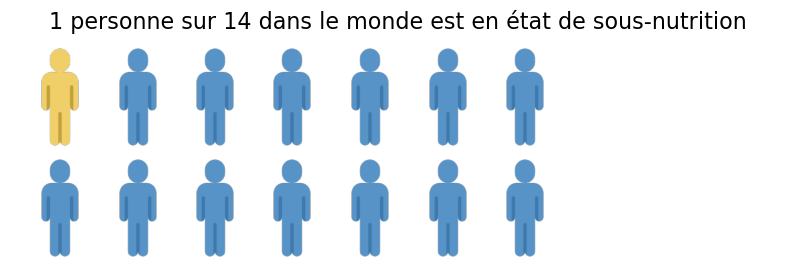

In [33]:
#Création d'une représentation visuelle du nombre de personnes en état de sous nutrition sur x

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import urllib.request

# Charger les images
with urllib.request.urlopen('https://riverphot.ovh/notebook/color_image.png') as url:
    image_color = np.array(Image.open(url))
with urllib.request.urlopen('https://riverphot.ovh/notebook/gray_image.png') as url:
    image_gray = np.array(Image.open(url))

# Dimensions des images
h, w, _ = image_color.shape

# Création de la figure
fig, ax = plt.subplots(figsize=(10, 4))  # Augmenter la hauteur 
ax.set_xlim(0, 7 * w)  # Ajuster le nombre d'images par ligne
ax.set_ylim(0, 2 * h)  # Ajuster le nombre de lignes

# Ajouter les images dans le graphique 
for i in range(14):
    if i < 1:  # 1 personne en sous-nutrition
        image = image_color
    else:
        image = image_gray
    
    # Position sur deux lignes
    x = (i % 7) * (w * 0.7)  
    y = h if i < 7 else 0  
    ax.imshow(image, extent=[x, x + w * 0.9, y, y + h * 0.9])  

# Suppression des axes
ax.axis('off')
plt.title('1 personne sur 14 dans le monde est en état de sous-nutrition', fontsize=16)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

# Besoins Énergétiques et Consommation Alimentaire Moyenne

Les besoins énergétiques alimentaires varient en fonction de l'âge, du sexe, du niveau d'activité physique, et de la santé physique d'un individu.  
En général, pour un adulte moyen, l'Organisation Mondiale de la Santé (OMS) préconise :  
**Femmes** : environ **1 800 à 2 400 calories par jour**.  
**Hommes** : environ **2 200 à 3 000 calories par jour**.

---

Globalement, la consommation alimentaire moyenne par personne est d'environ **675,2 kg de nourriture par an**, soit environ **1,85 kg par jour**.  
Mais cette moyenne représente de fortes disparités à l'échelle mondiale, pouvant aller jusqu'à **860 kg** aux États-Unis et en dessous de **550 kg** en Afrique.

---

Pour atteindre un apport calorique de **2 000 à 3 000 calories par jour**, une personne devrait consommer entre **1,5 et 2,5 kg de nourriture**, mais répartie entre différents types d'aliments, dont au moins **400 grammes par jour de fruits et légumes** (recommandation OMS).


In [34]:
#Combien mange en moyenne un être humain ? 
#Source => 
#https://www.who.int/fr/news-room/fact-sheets/detail/healthy-diet
#https://ourworldindata.org/food-supply

In [35]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population

# Pour rappel on avait filtrer les données pour l'année 2017 dans le DataFrame population
# population_2017

#On effectue la jointure entre les deux tables via la Zone
dispo_alimentaire_population=pd.merge(dispo_alimentaire, population_2017, on='Zone', how='left')

# Vérification du nombre de lignes
nombre_lignes_dispo_alimentaire = dispo_alimentaire.shape[0]
nombre_lignes_jointure_dispo_alimentaire = dispo_alimentaire_population.shape[0]

print(f"Nombre de lignes dans le dataset dispo_alimentaire : {nombre_lignes_dispo_alimentaire}")
print(f"Nombre de lignes après la jointure : {nombre_lignes_jointure_dispo_alimentaire}")

if nombre_lignes_dispo_alimentaire == nombre_lignes_jointure_dispo_alimentaire:
    print("Le nombre de lignes est identique, la jointure est correcte.")
else:
    print("Il y a une différence dans le nombre de lignes, quelque chose ne va pas.")

Nombre de lignes dans le dataset dispo_alimentaire : 15605
Nombre de lignes après la jointure : 15605
Le nombre de lignes est identique, la jointure est correcte.


In [36]:
#Affichage du nouveau dataframe
dispo_alimentaire_population.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0


In [37]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement

#La colonne Disponibilité alimentaire (Kcal/personne/jour) nous indique le nombre de calories disponible.
#On multiplie par la population pour obtenir le nombre de calories disponible par aliment par pays --> dispo_kcal

dispo_alimentaire_population['dispo_kcal'] = (
    dispo_alimentaire_population['Disponibilité alimentaire (Kcal/personne/jour)'] * 
    dispo_alimentaire_population['Population'] 
)

#On peut également calculer le nombre de calories disponible à l'année
dispo_alimentaire_population['dispo_kcal_an'] = (
    dispo_alimentaire_population['dispo_kcal'] * 365
)

#Affichage du dataframe
dispo_alimentaire_population.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal,dispo_kcal_an
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,...,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017.0,36296113.0,181480565.0,6.624041e+10
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017.0,36296113.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,0.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,145184452.0,5.299232e+10


In [38]:
#Calcul du nombre d'humains pouvant être nourris

#Pour rappel, les besoins calorique d'un individu se situe entre 2000 et 3000 calories par jour, nous prendrons donc une moyenne de 2500 calories/jour
# Besoin calorique moyen par jour par personne
besoin_calorique_par_jour = 2500
print(f"Le besoin calorique moyen par jour par personne est de {besoin_calorique_par_jour} kcal.")

#NB : Les termes "calories" et "kcal" (kilocalories) sont utilisés de manière interchangeable en nutrition, où 1 kcal est équivalent à 1 Calorie. 
#Ainsi, un besoin énergétique moyen de 2500 calories par jour correspond à 2500 kcal.

# Nombre total des kcal disponibles mondialement
total_dispo_kcal_mondial = dispo_alimentaire_population['dispo_kcal'].sum()
# Afficher le total des kcal disponibles mondialement en milliards
total_dispo_kcal_mondial_milliards = total_dispo_kcal_mondial / 1_000_000_000
print(f"Le total des kcal disponibles mondialement est de {total_dispo_kcal_mondial_milliards:.2f} milliards de kcal.")

# Nombre total de personnes pouvant être nourries par jour
nombre_humains_nourris = total_dispo_kcal_mondial / besoin_calorique_par_jour
# Afficher le nombre d'humains pouvant être nourris en milliards
nombre_humains_nourris_milliards = nombre_humains_nourris / 1_000_000_000
print(f"Le nombre d'humains pouvant être nourris est d'environ {nombre_humains_nourris_milliards:.2f} milliards de personnes par jour.")

Le besoin calorique moyen par jour par personne est de 2500 kcal.
Le total des kcal disponibles mondialement est de 20918.98 milliards de kcal.
Le nombre d'humains pouvant être nourris est d'environ 8.37 milliards de personnes par jour.


**Les ressources disponibles permettrait de nourir 8.37 milliards de personnes**

**La planète compte en 2017, 7,55 milliards d’habitants**  

**Les ressources alimentaires mondiales sont suffisantes pour nourrir l'ensemble de la population mondiale.**  
C'est donc l'inégalité à l'accès aux ressources qui est le véritable problème de la sous-nutrition.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [39]:
#Transfert des données avec les végétaux dans un nouveau dataframe

# Filtrage des données pour ne conserver que les produits végétaux
produits_vegetaux = dispo_alimentaire_population.loc[dispo_alimentaire_population['Origine'] == 'vegetale']

#Affichage du dataframe
produits_vegetaux.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal,dispo_kcal_an
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017.0,36296113.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,0.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,145184452.0,5.299232e+10
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000000.0,...,3000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,0.0,0.000000e+00


In [40]:
#Calcul du nombre de kcal disponible pour les végétaux

# Nombre total des kcal disponibles mondialement uniquement pour les végéteaux
total_dispo_kcal_vegetal_mondial = produits_vegetaux['dispo_kcal'].sum()
# Afficher le total des kcal disponibles mondialement en milliards pour les végéteaux
total_dispo_kcal_vegetal_mondial_milliards = total_dispo_kcal_vegetal_mondial / 1_000_000_000
print(f"Le total des kcal disponibles mondialement en végétaux est de {total_dispo_kcal_vegetal_mondial_milliards:.2f} milliards de kcal.")

Le total des kcal disponibles mondialement en végétaux est de 17260.76 milliards de kcal.


In [41]:
#Calcul du nombre de kcal disponible pour les source d'origine animale
#Pour vérification

# Filtrage des données pour ne conserver que les produits animale
produits_animaux = dispo_alimentaire_population[dispo_alimentaire_population['Origine'] == 'animale']
# Nombre total des kcal disponibles mondialement uniquement pour les sources animales
total_dispo_kcal_animal_mondial = produits_animaux['dispo_kcal'].sum()
# Afficher le total des kcal disponibles mondialement en milliards pour les sources d'origine animale
total_dispo_kcal_animal_mondial_milliards = total_dispo_kcal_animal_mondial / 1_000_000_000
print(f"Le total des kcal disponibles mondialement de source animale est de {total_dispo_kcal_animal_mondial_milliards:.2f} milliards de kcal.")

# Addition des calories des sources végétales et animales
total_dispo_kcal_combined = total_dispo_kcal_vegetal_mondial + total_dispo_kcal_animal_mondial
total_dispo_kcal_combined_milliards = total_dispo_kcal_combined / 1_000_000_000

# Afficher le résultat
print(f"Le total des kcal disponibles combinées (végétales + animales) est de {total_dispo_kcal_combined_milliards:.2f} milliards de kcal.")

# Comparer le total combiné avec le total mondial
if total_dispo_kcal_combined == total_dispo_kcal_mondial:
    print("Le total des kcal combinées (végétales + animales) est égal au total des kcal disponibles mondialement.")
else:
    print(f"Le total des kcal combinées (végétales + animales) est de {total_dispo_kcal_combined_milliards:.2f} milliards de kcal, "
          f"ce qui est différent du total des kcal disponibles mondialement de {total_dispo_kcal_mondial_milliards:.2f} milliards de kcal.")

Le total des kcal disponibles mondialement de source animale est de 3658.22 milliards de kcal.
Le total des kcal disponibles combinées (végétales + animales) est de 20918.98 milliards de kcal.
Le total des kcal combinées (végétales + animales) est égal au total des kcal disponibles mondialement.


In [42]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux

# Nombre total de personnes pouvant être nourries par jour avec des produits de source végétale
nombre_humains_nourris_vegetaux = total_dispo_kcal_vegetal_mondial / besoin_calorique_par_jour
# Afficher le nombre d'humains pouvant être nourris en milliards uniquement avec des végétaux
nombre_humains_nourris_vegetaux_milliards = nombre_humains_nourris_vegetaux / 1_000_000_000
print(f"Le nombre d'humains pouvant être nourris avec des végétaux est d'environ {nombre_humains_nourris_vegetaux_milliards:.2f} milliards de personnes par jour.")

Le nombre d'humains pouvant être nourris avec des végétaux est d'environ 6.90 milliards de personnes par jour.


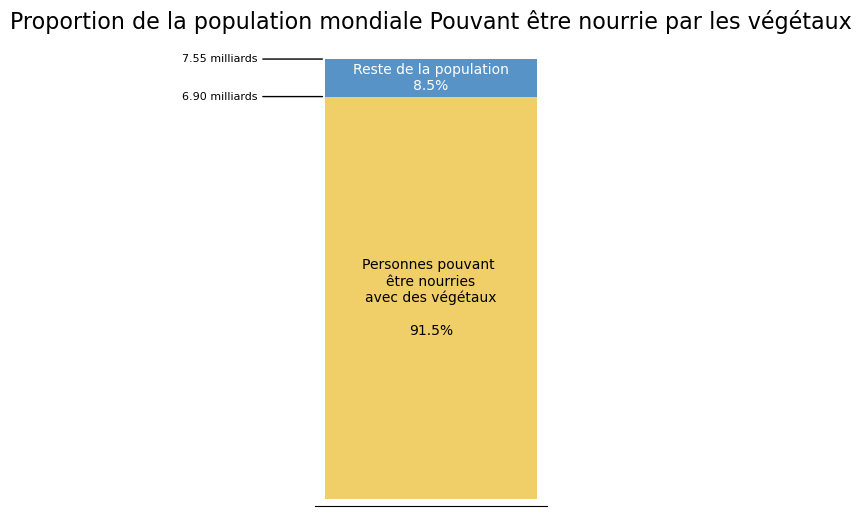

In [43]:
# Création d'un histogramme emplié pour visualiser le pourcentage de personnes povant être nourris avec des végétaux.

# Importation de la bibliothèque Seaborn pour améliorer le rendu des graphiques
import seaborn as sns

# Calculs pour le reste de la population
reste_population_milliards = population_mondiale_milliards - nombre_humains_nourris_vegetaux_milliards

# Calcul des pourcentages
pourcentage_nourries = (nombre_humains_nourris_vegetaux_milliards / population_mondiale_milliards) * 100
pourcentage_non_nourries = 100 - pourcentage_nourries

# Labels pour les catégories
labels = ['Population mondiale']

# Données pour chaque segment
nourries = [nombre_humains_nourris_vegetaux_milliards]
non_nourries = [reste_population_milliards]

# Création du graphique en barres empilées avec Seaborn
plt.figure(figsize=(3, 6))  
bar1 = plt.bar(labels, nourries, color='#F0CF68')
bar2 = plt.bar(labels, non_nourries, bottom=nourries, color='#5893C7')

# Ajout du texte directement sur les zones colorées 
plt.text(0, nombre_humains_nourris_vegetaux_milliards / 2, f'Personnes pouvant \nêtre nourries\navec des végétaux\n\n{pourcentage_nourries:.1f}%', ha='center', va='center', fontsize=10, color='black')
plt.text(0, nombre_humains_nourris_vegetaux_milliards + reste_population_milliards / 2, f'Reste de la population\n{pourcentage_non_nourries:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Ajout de l'indicateur de séparation à gauche pour les personnes nourries avec des végétaux
plt.annotate(f'{nombre_humains_nourris_vegetaux_milliards:.2f} milliards',
             xy=(-0.4, nombre_humains_nourris_vegetaux_milliards), 
             xytext=(-0.8, nombre_humains_nourris_vegetaux_milliards), 
             ha='center', va='center', fontsize=8,
             arrowprops=dict(facecolor='#C7C7C7', arrowstyle='-'))

# Ajout de l'indicateur en haut pour la population totale
plt.annotate(f'{population_mondiale_milliards:.2f} milliards',
             xy=(-0.4, population_mondiale_milliards), 
             xytext=(-0.8, population_mondiale_milliards), 
             ha='center', va='center', fontsize=8,
             arrowprops=dict(facecolor='#C7C7C7', arrowstyle='-'))

# Suppression des axes
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

# Suppression du cadre noir autour du graphique
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_position(('outward', 5))  # Garder seulement la ligne du bas

# Ajout du titre
plt.title('Proportion de la population mondiale Pouvant être nourrie par les végétaux', fontsize=16)

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [44]:
#Affichage du dataframe dispo_alimentaire
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#Calcul de la disponibilité totale

# Calcul de la disponibilité intérieure totale (en kilogrammes)
disponibilite_interieure_totale_kg = dispo_alimentaire['Disponibilité intérieure'].sum()

# Convertir en milliards de tonnes pour une meilleure lisibilité
disponibilite_interieure_totale_milliards_tonnes = disponibilite_interieure_totale_kg / 1_000_000_000

# Afficher le résultat en milliards de kilogrammes
print(f"La disponibilité intérieure totale est de {disponibilite_interieure_totale_milliards_tonnes:.2f} milliards de tonnes.")

La disponibilité intérieure totale est de 9848.99 milliards de tonnes.


In [46]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 

# Liste complète des colonnes à analyser
colonnes_a_analyser = [
    'Aliments pour animaux', 
    'Autres Utilisations', 
    'Disponibilité intérieure', 
    'Exportations - Quantité', 
    'Importations - Quantité', 
    'Nourriture', 
    'Pertes', 
    'Production', 
    'Semences', 
    'Traitement', 
    'Variation de stock'
]

# Initialisation d'un dictionnaire pour stocker les sommes des colonnes
somme_colonnes = {}

# Boucle for pour calculer et stocker les sommes des valeurs pour chaque colonne
for colonne in colonnes_a_analyser:
    # Calcul de la somme des valeurs pour la colonne actuelle
    total_valeur = dispo_alimentaire[colonne].sum()
    
    # Convertir en milliards de tonnes pour une meilleure lisibilité
    total_valeur_tonnes = total_valeur / 1_000_000_000
    
    # Stocker la somme dans le dictionnaire
    somme_colonnes[colonne] = total_valeur_tonnes
    
    # Afficher les résultats 
    print(f"Le total pour la colonne '{colonne}' est de {total_valeur_tonnes:.2f} milliards de tonnes.")

Le total pour la colonne 'Aliments pour animaux' est de 1304.24 milliards de tonnes.
Le total pour la colonne 'Autres Utilisations' est de 865.02 milliards de tonnes.
Le total pour la colonne 'Disponibilité intérieure' est de 9848.99 milliards de tonnes.
Le total pour la colonne 'Exportations - Quantité' est de 1352.16 milliards de tonnes.
Le total pour la colonne 'Importations - Quantité' est de 1296.05 milliards de tonnes.
Le total pour la colonne 'Nourriture' est de 4876.26 milliards de tonnes.
Le total pour la colonne 'Pertes' est de 453.70 milliards de tonnes.
Le total pour la colonne 'Production' est de 10009.68 milliards de tonnes.
Le total pour la colonne 'Semences' est de 154.68 milliards de tonnes.
Le total pour la colonne 'Traitement' est de 2204.69 milliards de tonnes.
Le total pour la colonne 'Variation de stock' est de -104.40 milliards de tonnes.


## Répartition de l'Utilisation Domestique de la Disponibilité Intérieure

La disponibilité intérieure est calculée en prenant en compte la production nationale, les importations, les exportations, et la variation des stocks. Cette disponibilité intérieure représente la quantité totale de produits alimentaires disponibles dans un pays après avoir pris en compte les flux entrant et sortant.

**Disponibilité Intérieure = Production + Importations – Exportations + Variation de Stock**

Nous allons représenter ici la répartition de l’utilisation domestique de la disponibilité intérieure. Ce graphique montre comment la disponibilité intérieure est utilisée à l'intérieur du pays, en incluant des catégories telles que : **Aliments pour animaux**, **Autres utilisations**, **Nourriture**, **Pertes**, **Semences** et **Traitement**.

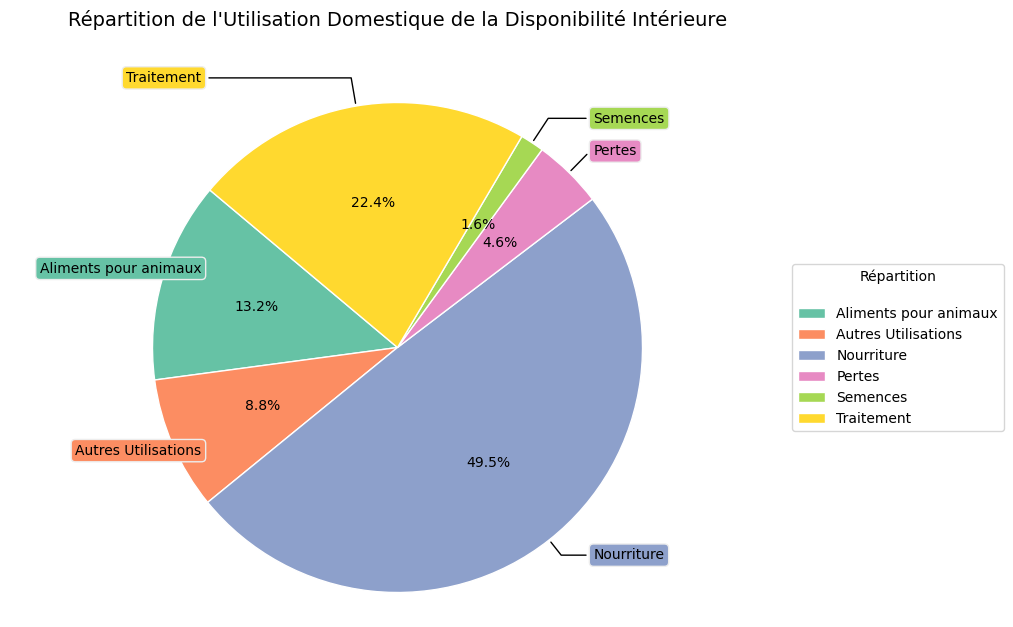

In [47]:
#Représentation graphique de l'utiliation de la disponibilité intérieur à l'échelle mondiale

import numpy as np

# Sélection des colonnes pertinentes pour la répartition de la disponibilité intérieure
colonnes_pertinentes = [
    'Aliments pour animaux', 
    'Autres Utilisations', 
    'Nourriture', 
    'Pertes', 
    'Semences', 
    'Traitement'
]

# Extraction des valeurs à partir du dictionnaire pour les colonnes pertinentes
values = [somme_colonnes[colonne] for colonne in colonnes_pertinentes]

# Choix d'une palette de couleurs avec Seaborn
colors = sns.color_palette('Set2', len(colonnes_pertinentes))

# Création du graphique en secteur avec contour blanc autour des tranches
plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(values, colors=colors, startangle=140, 
                                   autopct='%1.1f%%', wedgeprops=dict(edgecolor='w'))

# Personnalisation des autotexts (pourcentages)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('black')

# Ajouter les légendes à côté des secteurs en utilisant des coordonnées polaires
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x = np.cos(np.radians(angle))
    y = np.sin(np.radians(angle))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)
    plt.annotate(colonnes_pertinentes[i],
                 xy=(x, y), xytext=(0.80 * np.sign(x), 1.1 * y),
                 horizontalalignment=horizontalalignment, 
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='#EDEDED', facecolor=colors[i]),
                 arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle))

# Ajouter une légende avec les codes couleurs
plt.legend(wedges, colonnes_pertinentes, title="Répartition\n", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Répartition de l\'Utilisation Domestique de la Disponibilité Intérieure\n\n', fontsize=14)
plt.axis('equal')  # Assure que le graphique est un cercle
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [48]:
#Création d'une liste avec toutes les variables

# Liste des céréales
liste_cereales = [
    'Blé',
    'Riz (Eq Blanchi)',
    'Orge',
    'Maïs',
    'Seigle',
    'Avoine',
    'Millet',
    'Sorgho',
    'Céréales, Autres'
]

In [49]:
#Création d'un dataframe avec les informations uniquement pour ces céréales

# Filtrage des données pour ne conserver que les produits céréaliers
produits_cerealiers = dispo_alimentaire_population[dispo_alimentaire_population['Produit'].isin(liste_cereales)]

#Affichage du dataframe
produits_cerealiers.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal,dispo_kcal_an
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,...,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,2017.0,36296113.0,4.968938e+10,1.813662e+13
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,2017.0,36296113.0,0.000000e+00,0.000000e+00
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,...,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,2017.0,36296113.0,7.622184e+08,2.782097e+11
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,...,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,2017.0,36296113.0,1.088883e+08,3.974424e+10
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,...,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,2017.0,36296113.0,9.436989e+08,3.444501e+11


In [50]:
#Affichage de la proportion d'alimentation animale

# Calcul de la somme des aliments pour animaux
somme_aliments_animaux = produits_cerealiers['Aliments pour animaux'].sum()

# Calcul de la somme de la production totale de produits céréaliers
somme_production_totale = produits_cerealiers['Production'].sum()

# Calcul de la proportion d'alimentation animale par rapport à la production totale
proportion_aliments_animaux = (somme_aliments_animaux / somme_production_totale) * 100

# Affichage du résultat
print(f"La proportion de la production totale de produits céréaliers destinée à l'alimentation animale est de {proportion_aliments_animaux:.2f}%.")

La proportion de la production totale de produits céréaliers destinée à l'alimentation animale est de 34.62%.


In [51]:
#Affichage de la proportion d'alimentation humaine

# Calcul de la somme de la colonne 'Nourriture'
somme_nourriture_humaine = produits_cerealiers['Nourriture'].sum()

# Calcul de la proportion de la production destinée à la nourriture humaine
proportion_nourriture_humaine = (somme_nourriture_humaine / somme_production_totale) * 100

# Affichage du résultat
print(f"La proportion de la production totale destinée à la nourriture humaine est de {proportion_nourriture_humaine:.2f}%.")

La proportion de la production totale destinée à la nourriture humaine est de 40.78%.


### Répartition de l'Utilisation des Céréales à l'Échelle Mondiale

La production mondiale de céréales joue un rôle crucial dans la satisfaction des besoins alimentaires de diverses populations. Voici la répartition de l'utilisation des céréales à l'échelle mondiale :

- **34,62%** de la production totale de céréales est destinée à l'alimentation animale.
- **40,78%** de la production totale de céréales est destinée à la consommation humaine.

In [52]:
#Répartition de la consommation en pourcentage d'alimentation humaine ou animale détaillée par céréales

repartition_cereales = []

# Boucle pour calculer la répartition pour chaque céréale
for cereale in liste_cereales:
    df_cereale = produits_cerealiers[produits_cerealiers['Produit'] == cereale]  
    # Calcul de la production totale
    production_totale = df_cereale['Production'].sum()
    # Calcul de la proportion pour l'alimentation animale
    proportion_animale = round((df_cereale['Aliments pour animaux'].sum() / production_totale) * 100, 2)
    # Calcul de la proportion pour la nourriture humaine 
    proportion_humaine = round((df_cereale['Nourriture'].sum() / production_totale) * 100, 2)
    
    # Ajout des résultats dans une liste
    repartition_cereales.append({
        'Céréale': cereale,
        'Alimentation animale (%)': proportion_animale,
        'Nourriture humaine (%)': proportion_humaine
    })

# Conversion en DataFrame pour l'affichage
df_repartition_cereales = pd.DataFrame(repartition_cereales)

# Affichage des résultats
df_repartition_cereales.head(10)


,Céréale,Alimentation animale (%),Nourriture humaine (%)
0,Blé,18.30,64.62
1,Riz (Eq Blanchi),6.78,76.15
2,Orge,65.04,4.77
3,Maïs,53.70,12.31
4,Seigle,48.47,32.92
5,Avoine,68.24,16.39
6,Millet,11.44,79.70
7,Sorgho,39.94,38.88
8,"Céréales, Autres",67.00,18.74


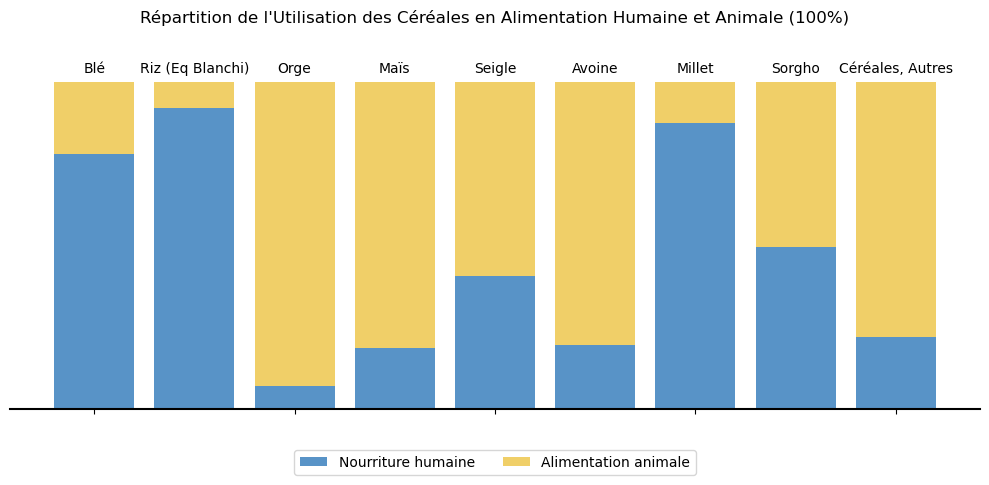

In [53]:
#Graphique représentant la répartition de consommation humaine et animale pour chaque céréales
#Graphique en barres empilées à 100% représentant la répartition relative de chaque catégorie
#Pour un aperçu des utilisations et proportions d'utilisation de chaque céréales

# Normalisation des proportions pour chaque céréale pour que la somme soit égale à 100%
df_repartition_cereales['Total'] = df_repartition_cereales['Nourriture humaine (%)'] + df_repartition_cereales['Alimentation animale (%)']
df_repartition_cereales['Nourriture humaine (%)'] = (df_repartition_cereales['Nourriture humaine (%)'] / df_repartition_cereales['Total']) * 100
df_repartition_cereales['Alimentation animale (%)'] = (df_repartition_cereales['Alimentation animale (%)'] / df_repartition_cereales['Total']) * 100

# Configuration du graphique
fig, ax = plt.subplots(figsize=(10, 5))

# Position des barres sur l'axe des x
x = np.arange(len(df_repartition_cereales['Céréale']))

# Largeur des barres
width = 0.8

# Création des barres empilées à 100%
bars1 = ax.bar(x, df_repartition_cereales['Nourriture humaine (%)'], width, label='Nourriture humaine', color='#5893C7')
bars2 = ax.bar(x, df_repartition_cereales['Alimentation animale (%)'], width, bottom=df_repartition_cereales['Nourriture humaine (%)'], label='Alimentation animale', color='#F0CF68')

# Ajout des labels en haut de chaque barre empilée
for i in range(len(x)):
    ax.text(x[i], 102, df_repartition_cereales['Céréale'][i], ha='center', va='bottom', fontsize=10)

# Suppression des labels des abscisses (les noms des céréales en bas)
ax.set_xticklabels([])

# Ajout des labels et des titres
ax.set_title('Répartition de l\'Utilisation des Céréales en Alimentation Humaine et Animale (100%)\n\n')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2)

# Suppression des axes sauf celui du bas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Augmenter l'épaisseur de la barre noire en bas

# Suppression de l'axe des ordonnées
ax.get_yaxis().set_visible(False)

# Affichage du graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [54]:
#Création de la colonne proportion par pays

# Création de la colonne 'Proportion sous-alimentée'
population_sous_nutrition['Pourcentage sous-nutrition'] = (population_sous_nutrition['sous_nutrition'] / population_sous_nutrition['Population']) * 100

# Arrondir les valeurs à deux chiffres après la virgule tout en conservant le type float
population_sous_nutrition['Pourcentage sous-nutrition'] = population_sous_nutrition['Pourcentage sous-nutrition'].round(2)

# Afficher le DataFrame pour vérifier
population_sous_nutrition.head()

,Zone,Année,Population,Période,sous_nutrition,Pourcentage sous-nutrition
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0,28.93
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0,5.44
2,Albanie,2017,2884169.0,2016-2018,100000.0,3.47
3,Algérie,2017,41389189.0,2016-2018,1300000.0,3.14
4,Allemagne,2017,82658409.0,2016-2018,NaN,NaN


# Les pays avec la plus forte proportion de sous-nutrition en 2017

Le tableau ci-dessous présente les 10 pays où la proportion de la population sous-alimentée était la plus élevée cette année-là.


In [55]:
#affichage après trie des 10 pires pays

# Tri du DataFrame par la colonne 'Pourcentage sous-nutrition' en ordre décroissant
population_sous_nutrition_sort = population_sous_nutrition.sort_values(by='Pourcentage sous-nutrition', ascending=False)

# Affichage des 10 pays avec la plus forte proportion de personnes sous-alimentées
population_sous_nutrition_sort.head(10)[['Zone', 'Pourcentage sous-nutrition']]

,Zone,Pourcentage sous-nutrition
87,Haïti,48.26
181,République populaire démocratique de Corée,47.19
128,Madagascar,41.06
122,Libéria,38.28
119,Lesotho,38.25
216,Tchad,37.96
186,Rwanda,35.06
145,Mozambique,32.81
219,Timor-Leste,32.17
0,Afghanistan,28.93


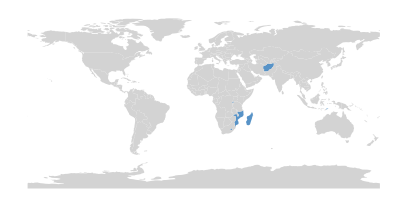

In [56]:
import geopandas as gpd

# Suppose que 'population_sous_nutrition_sort' est déjà trié par 'Pourcentage sous-nutrition'
# Extraction des 10 premiers pays
top_10_countries = population_sous_nutrition_sort.head(10)['Zone'].tolist()

# Charger le jeu de données géographique du monde à partir du fichier téléchargé
world = gpd.read_file('cartes/ne_110m_admin_0_countries.shp')

# Créer une nouvelle colonne 'color' pour indiquer les pays à colorer
world['color'] = world['NAME'].apply(lambda x: 'colored' if x in top_10_countries else 'not_colored')

# Tracer la carte sans les cadres noirs et sans légendes de chiffres
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
world[world['color'] == 'colored'].plot(ax=ax, color='#5893C7', edgecolor='none', linewidth=0)
world[world['color'] == 'not_colored'].plot(ax=ax, color='lightgrey', edgecolor='none', linewidth=0)

# Supprimer les ticks des axes
ax.set_xticks([])
ax.set_yticks([])

# Supprimer la bordure du graphique (le cadre noir autour de la carte)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [57]:
#calcul du total de l'aide alimentaire par pays

# Afficher les résultats
aide_alimentaire.head()

# Calculer le total de l'aide alimentaire par pays bénéficiaire (Zone)
total_aide_par_pays = aide_alimentaire.groupby('Zone')['Valeur'].sum().reset_index()

# Afficher les résultats
total_aide_par_pays.head()

,Zone,Valeur
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000


# Les pays qui ont le plus bénéficié de l'aide alimentaire depuis 2013

Le tableau ci-dessous présente les 10 pays qui ont le plus bénéficié de l'aide alimentaire depuis 2013.
Les valeurs étant représentées en quantités, elles sont à mettre en perspective avec la taille de la population d'un pays.
C'est pour cela que cette liste n'est pas corrélée avec les pays ayant la plus forte proportion de personnes en sous nutrition. 

In [58]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire

# Trier les pays par le total de l'aide alimentaire reçue, du plus élevé au plus faible
total_aide_par_pays_sorted = total_aide_par_pays.sort_values(by='Valeur', ascending=False)

# Afficher les résultats
total_aide_par_pays_sorted.head(10)

,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


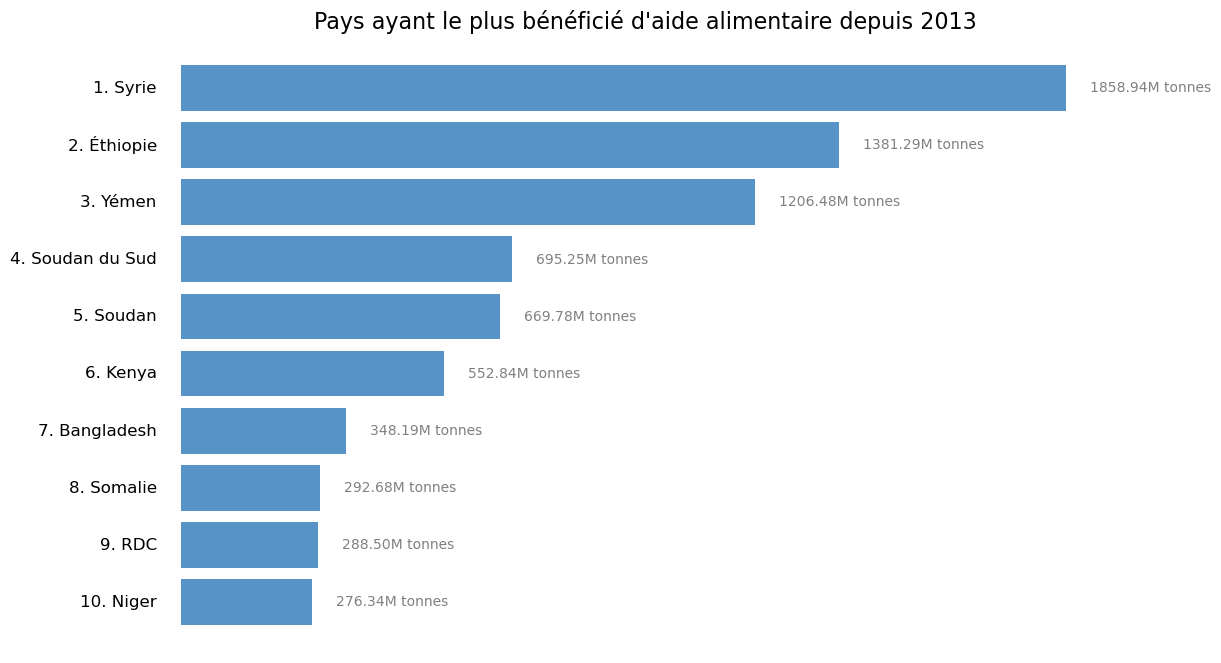

In [59]:
#Création d'un graphique représentant le top 10 des pays ayant bénéficié de l'aide alimentaire

data = {
    'Zone': ['Syrie', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan', 
             'Kenya', 'Bangladesh', 'Somalie', 'RDC', 'Niger'],
    'Valeur': [1858943000, 1381294000, 1206484000, 695248000, 669784000, 
               552836000, 348188000, 292678000, 288502000, 276344000],
}

df = pd.DataFrame(data)

# Convertir les valeurs en millions de tonnes pour plus de lisibilité
df['Valeur'] = df['Valeur'] / 1_000_000  # Conversion en millions de kg (ou milliers de tonnes)

# Trier les données par valeur décroissante
df = df.sort_values(by='Valeur', ascending=False)  # Trier en ordre décroissant pour avoir le plus grand en haut

# Configuration du graphique
fig, ax = plt.subplots(figsize=(12, 8))

# Création des barres horizontales
bars = ax.barh(df.index, df['Valeur'], color='#5893C7')

# Ajout des numéros et noms des pays à gauche avec un espace de 50 pixels
for i, (index, row) in enumerate(df.iterrows()):
    ax.text(-50, index, f'{i+1}. {row["Zone"]}', va='center', ha='right', fontsize=12)

# Ajout des valeurs à droite des barres, avec une taille de police plus petite et une couleur grise
for i, (index, value) in enumerate(zip(df.index, df['Valeur'])):
    ax.text(value + 50, index, f'{value:.2f}M tonnes', va='center', ha='left', fontsize=10, color='gray')

# Inverser l'axe des y pour que le premier soit en haut
ax.invert_yaxis()

# Suppression des axes inutiles
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Ajout du titre
plt.title('Pays ayant le plus bénéficié d\'aide alimentaire depuis 2013', fontsize=16)

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [60]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 

# Créer un DataFrame avec les colonnes Zone, Année et Aide alimentaire
aide__alimentaire_annuelle = aide_alimentaire.groupby(['Zone', 'Année'])['Valeur'].sum().reset_index()

# Affichage des premières lignes pour vérifier
aide__alimentaire_annuelle.head()

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000


In [61]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire

# Sélectionner les 5 premiers pays ayant le plus bénéficié de l'aide alimentaire (comme calculé précedemment)
top_5_pays = total_aide_par_pays_sorted.iloc[:5]['Zone'].tolist()

# Afficher la liste des 5 premiers pays
print("Les 5 pays ayant le plus bénéficié de l'aide alimentaire sont :")
print(top_5_pays)


Les 5 pays ayant le plus bénéficié de l'aide alimentaire sont :
['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']


In [62]:
#On filtre sur le dataframe avec notre liste
aide_alimentaire_top_5 = aide__alimentaire_annuelle[aide__alimentaire_annuelle['Zone'].isin(top_5_pays)]

In [63]:
# Affichage des pays avec l'aide alimentaire par année

# Compter le nombre de lignes dans le DataFrame
nombre_lignes = aide_alimentaire_top_5.shape[0]

aide_alimentaire_top_5.head(nombre_lignes)

,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


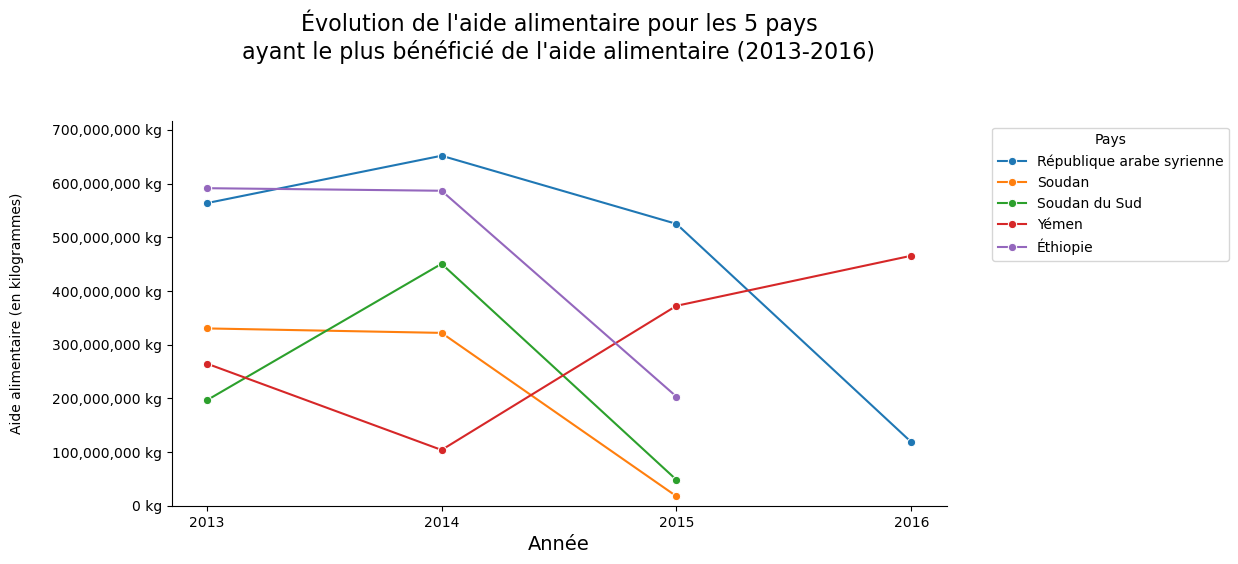

In [66]:
#Graphique représentant l'évolution de l'aide alimentaire dans les pays qui ont en le plus bénéficié de 2013 à 2016

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Création d'un Line Plot pour chaque pays avec les valeurs en kilogrammes
plt.figure(figsize=(10, 5))
sns.lineplot(data=aide_alimentaire_top_5, x='Année', y='Valeur', hue='Zone', marker='o')

# Ajout des titres et des légendes
plt.title("Évolution de l'aide alimentaire pour les 5 pays\nayant le plus bénéficié de l'aide alimentaire (2013-2016)\n\n", fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Aide alimentaire (en kilogrammes)", fontsize=10, labelpad=20)  # Ajout de labelpad pour espacer la légende des valeurs

# Affichage uniquement des années pleines sur l'axe des abscisses
plt.xticks(ticks=aide_alimentaire_top_5['Année'].unique(), labels=[str(int(year)) for year in aide_alimentaire_top_5['Année'].unique()])

# Ajustement de l'échelle de l'axe des ordonnées pour qu'elle corresponde aux valeurs en kilogrammes
plt.ylim(0, aide_alimentaire_top_5['Valeur'].max() * 1.1)

# Formatage des étiquettes de l'axe des ordonnées pour afficher des valeurs pertinentes
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f} kg'))

# Amélioration de l'esthétique avec Seaborn
sns.despine()

# Personnalisation de la légende pour la décaler plus à droite
plt.legend(title="Pays", bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichage du graphique
plt.show()

# Evolution de l'aide alimentaire pour les 5 pays ayant le plus bénéficié de l'aide alimentaire entre 2013 et 2016

Les pays ayant le plus bénéficié de l'aide aux cours de ces dernières années sont : **La Syrie, le Soudan et le Soudan du Sud, le Yémen et L'Ethiopie.
Ces pays sont principalement situés en Afrique Subsaharienne**.

A l'exception du Yémen, on notera que **l'aide attribuée à ces pays tend à diminuée au fil du temps voir à disparaître**.
Cela peut être le signe que l'apport d'une aide alimentaire importante ponctuelle aide à retrouver durablement une stabilité alimentaire dans un pays.e.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [67]:
#Calcul de la disponibilité en kcal par personne par jour par pays

#Groupement par Pays et somme de la disponibilité alimentaire (Kcal/personne/jour)
dispo_alimentaire_pays = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()

# Affichage des premières lignes pour vérifier
dispo_alimentaire_pays.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


In [68]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 

# Tri des pays par la disponibilité en kcal par personne par jour, du plus faible au plus élevé
dispo_alimentaire_pays_faible = dispo_alimentaire_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)

# Affichage des 10 pays avec la plus faible disponibilité en kcal par personne par jour
dispo_alimentaire_pays_faible.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


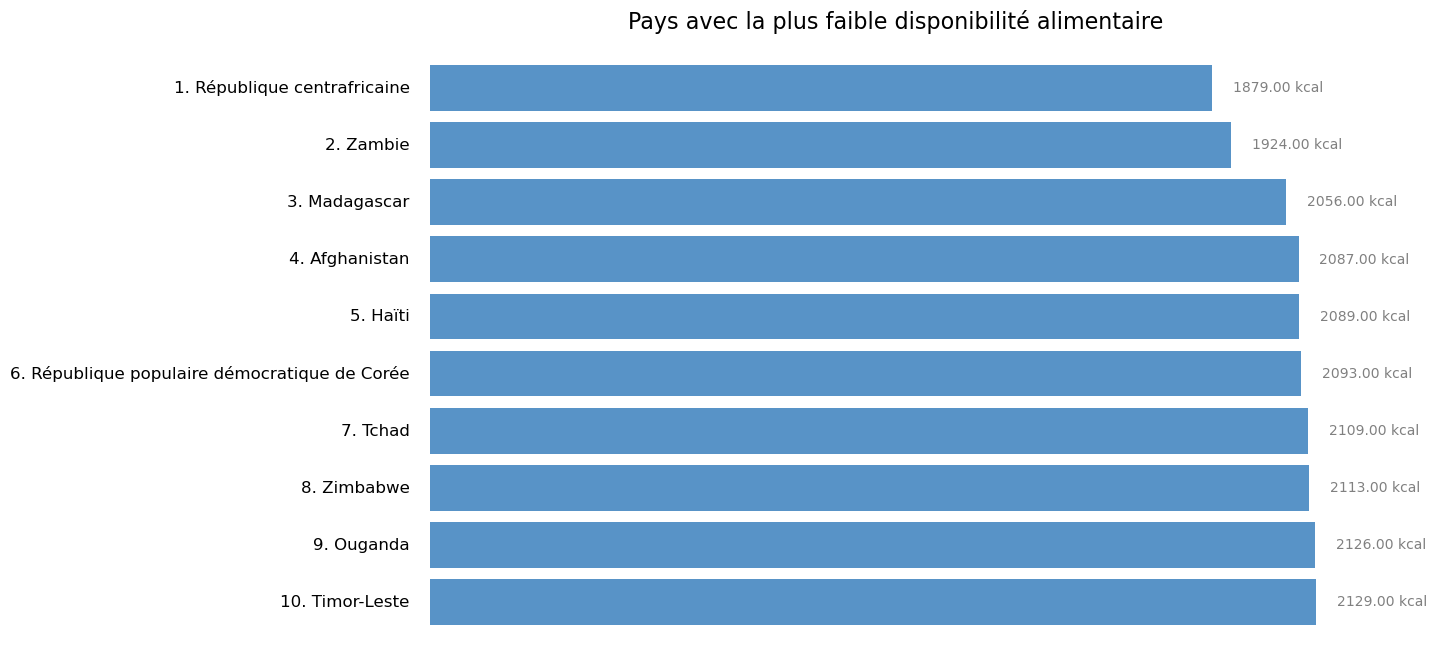

In [69]:
#Graphique représentant le top 10 des pays avec la plus faible disponibilité alimentaire

top_10_pays_faible_dispo_alimentaire = dispo_alimentaire_pays_faible.head(10)['Zone'].tolist()
top_10_valeur_faible_dispo_alimentaire = dispo_alimentaire_pays_faible.head(10)['Disponibilité alimentaire (Kcal/personne/jour)'].tolist()

# Create a dictionary with lists as values
data_pays_faible_dispo_alimentaire = {
    'Zone': top_10_pays_faible_dispo_alimentaire,  # Remove extra brackets
    'Valeur': top_10_valeur_faible_dispo_alimentaire  # Remove extra brackets
}

dfgraphfaible = pd.DataFrame(data_pays_faible_dispo_alimentaire)

# Configuration du graphique
fig, ax = plt.subplots(figsize=(12, 8))

# Création des barres horizontales
bars = ax.barh(dfgraphfaible['Zone'], dfgraphfaible['Valeur'], color='#5893C7') # Use 'Zone' directly for bar labels

# Ajout des valeurs à droite des barres, avec une taille de police plus petite et une couleur grise
for i, (index, value) in enumerate(zip(dfgraphfaible['Zone'], dfgraphfaible['Valeur'])):
    ax.text(value + 50, i, f'{value:.2f} kcal', va='center', ha='left', fontsize=10, color='gray') # Adjust text position and label

# Inverser l'axe des y pour que le premier soit en haut
ax.invert_yaxis()

# Ajout des numéros et noms des pays à gauche 
for i, (index, row) in enumerate(dfgraphfaible.iterrows()):
    ax.text(-50, index, f'{i+1}. {row["Zone"]}', va='center', ha='right', fontsize=12)

# Suppression des axes inutiles
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Ajout du titre
plt.title('Pays avec la plus faible disponibilité alimentaire', fontsize=16)

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [70]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 

# Tri des pays par la disponibilité en kcal par personne par jour, du plus élevé au plus faible
dispo_alimentaire_pays_eleve = dispo_alimentaire_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)

# Affichage des 10 pays avec la plus faible disponibilité en kcal par personne par jour
dispo_alimentaire_pays_eleve.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


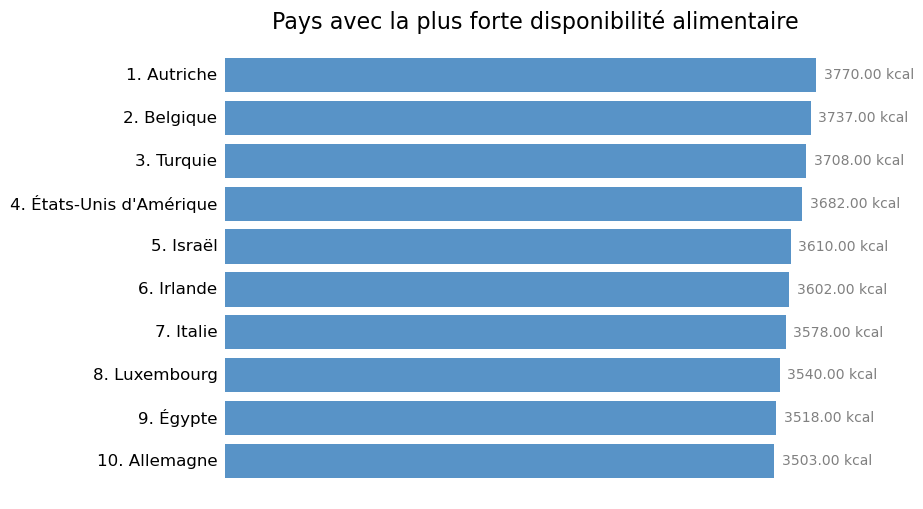

In [71]:
#Graphique représentant le top 10 des pays avec la plus forte disponibilité alimentaire

top_10_pays_forte_dispo_alimentaire = dispo_alimentaire_pays_eleve.head(10)['Zone'].tolist()
top_10_valeur_forte_dispo_alimentaire = dispo_alimentaire_pays_eleve.head(10)['Disponibilité alimentaire (Kcal/personne/jour)'].tolist()

# Create a dictionary with lists as values
data_pays_forte_dispo_alimentaire = {
    'Zone': top_10_pays_forte_dispo_alimentaire,  
    'Valeur': top_10_valeur_forte_dispo_alimentaire 
}

dfgraphforte = pd.DataFrame(data_pays_forte_dispo_alimentaire)

# Configuration du graphique
fig, ax = plt.subplots(figsize=(8, 6))

# Création des barres horizontales
bars = ax.barh(dfgraphforte['Zone'], dfgraphforte['Valeur'], color='#5893C7') # Use 'Zone' directly for bar labels

# Ajout des valeurs à droite des barres, avec une taille de police plus petite et une couleur grise
for i, (index, value) in enumerate(zip(dfgraphforte['Zone'], dfgraphforte['Valeur'])):
    ax.text(value + 50, i, f'{value:.2f} kcal', va='center', ha='left', fontsize=10, color='gray') # Adjust text position and label

# Inverser l'axe des y pour que le premier soit en haut
ax.invert_yaxis()

# Ajout des numéros et noms des pays à gauche avec un espace de 50 pixels
for i, (index, row) in enumerate(dfgraphforte.iterrows()):
    ax.text(-50, index, f'{i+1}. {row["Zone"]}', va='center', ha='right', fontsize=12)

# Suppression des axes inutiles
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Ajout du titre
plt.title('Pays avec la plus forte disponibilité alimentaire', fontsize=16)

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [72]:
#création d'un dataframe avec uniquement la Thaïlande 
dispo_alimentaire_thailande = dispo_alimentaire[dispo_alimentaire['Zone'] == 'Thaïlande']

# Affichage des premières lignes pour vérifier
dispo_alimentaire_thailande.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13759,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74000000.0,5.000000e+06,33000000.0,75000000.0,0.0,4.500000e+07,0.0,0.0,0.0
13760,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8000000.0,6.000000e+06,2000000.0,6000000.0,0.0,1.200000e+07,0.0,2000000.0,0.0
13761,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358000000.0,0.0,0.00,0.00,0.00,358000000.0,1.100000e+08,21000000.0,0.0,0.0,4.470000e+08,0.0,0.0,0.0
13762,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12000000.0,7.000000e+06,19000000.0,12000000.0,0.0,0.000000e+00,0.0,0.0,0.0
13763,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782000000.0,1.449000e+09,9000000.0,671000000.0,110000000.0,2.209000e+09,0.0,0.0,13000000.0


In [73]:
# Affichage uniquement du Manioc
# Filtrer les données pour ne garder que celles concernant le Manioc
dispo_alimentaire_thailande_manioc = dispo_alimentaire_thailande[dispo_alimentaire_thailande['Produit'] == 'Manioc']

dispo_alimentaire_thailande_manioc.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [74]:
#Calcul de la sous nutrition en Thaïlande

# Filtrer les données pour ne garder que celles concernant la Thaïlande
thailande_sous_nutrition = population_sous_nutrition[population_sous_nutrition['Zone'] == 'Thaïlande']

#Extraire le pourcentage
pourcentage_sous_nutrition = thailande_sous_nutrition['Pourcentage sous-nutrition'].values[0]
# Extraire la population totale
population_thailande = thailande_sous_nutrition['Population'].values[0]
# Calculer le nombre de personnes en sous-nutrition, puis formattage en million
nombre_personnes_sous_nutrition = (pourcentage_sous_nutrition / 100) * population_thailande / 1_000_000

# Affichages des résultats
print(f"Le pourcentage de la population en sous-nutrition en Thaïlande est de {pourcentage_sous_nutrition}%.")
print(f"Cela représente environ {nombre_personnes_sous_nutrition:.2f} millions de personnes.")

Le pourcentage de la population en sous-nutrition en Thaïlande est de 8.96%.
Cela représente environ 6.20 millions de personnes.


In [75]:
# On calcule la proportion exportée en fonction de la production

# Extraction de la quantité de Production de Manioc
quantite_production_kg = dispo_alimentaire_thailande_manioc['Production'].values[0]
# Conversion en millions de tonnes
quantite_production_millions_tonnes = quantite_production_kg / 1_000_000_000
print(f"La quantité de Manioc produit par la Thaïlande est d'environ {quantite_production_millions_tonnes:.2f} millions de tonnes.")

# Extraction de la quantité d'exportation de Manioc
quantite_exportation_kg = dispo_alimentaire_thailande_manioc['Exportations - Quantité'].values[0]
# Conversion en millions de tonnes
quantite_exportation_millions_tonnes = quantite_exportation_kg / 1_000_000_000
print(f"La quantité de Manioc exportée par la Thaïlande est d'environ {quantite_exportation_millions_tonnes:.2f} millions de tonnes.")

# Calcul de la proportion exportée par rapport à la production
proportion_exportee = (quantite_exportation_kg / quantite_production_kg) * 100
print(f"Ce qui représente environ {proportion_exportee:.2f}% de la production totale de Manioc en Thaïlande consacrée à l'exportation.")

La quantité de Manioc produit par la Thaïlande est d'environ 30.23 millions de tonnes.
La quantité de Manioc exportée par la Thaïlande est d'environ 25.21 millions de tonnes.
Ce qui représente environ 83.41% de la production totale de Manioc en Thaïlande consacrée à l'exportation.


In [76]:
# Filtrer pour la Thaïlande
dispo_thailande = dispo_alimentaire[dispo_alimentaire['Zone'] == 'Thaïlande']

# Somme de la disponibilité alimentaire en kcal pour la Thaïlande
somme_dispo_interieur_thailande = dispo_thailande['Disponibilité intérieure'].sum()

# Convertir en milliards de tonnes pour une meilleure lisibilité
somme_dispo_interieur_thailande_millions_tonnes = somme_dispo_interieur_thailande / 1_000_000_000

print("La disponibilité intérieure pour la Thaïlande:", somme_dispo_interieur_thailande_millions_tonnes,"millions de tonnes")

La disponibilité intérieure pour la Thaïlande: 158.13 millions de tonnes


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyses complémentaires</h2>
</div>

In [ ]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.1 - Part de la production consacré à l'exportation</h3>
</div>

In [77]:
# On étudie la part de la production consacré à l'exportation

# Grouper le DataFrame par Pays et sommer les colonnes Production et Exportations - Quantité
production_exportations_par_pays = dispo_alimentaire.groupby('Zone')[['Production', 'Exportations - Quantité']].sum().reset_index()

# Calculer le pourcentage d'exportation par rapport à la production
production_exportations_par_pays['Pourcentage Exportation'] = (production_exportations_par_pays['Exportations - Quantité'] / production_exportations_par_pays['Production']) * 100
production_exportations_par_pays['Pourcentage Exportation'] = production_exportations_par_pays['Pourcentage Exportation'].round(2)

# Afficher les premières lignes pour vérifier le résultat
production_exportations_par_pays.head(10)

,Zone,Production,Exportations - Quantité,Pourcentage Exportation
0,Afghanistan,1.117100e+10,2.780000e+08,2.49
1,Afrique du Sud,6.326300e+10,1.167400e+10,18.45
2,Albanie,3.964000e+09,9.400000e+07,2.37
3,Algérie,2.635900e+10,6.550000e+08,2.48
4,Allemagne,1.545470e+11,5.743100e+10,37.16
5,Angola,2.885700e+10,2.300000e+07,0.08
6,Antigua-et-Barbuda,2.000000e+07,0.000000e+00,0.00
7,Arabie saoudite,8.878000e+09,4.707000e+09,53.02
8,Argentine,1.761240e+11,5.233300e+10,29.71
9,Arménie,3.819000e+09,1.490000e+08,3.90


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.2 - Corrélation entre Disponibilité intérieur et Sous-Nutrition</h3>
</div>

In [78]:
# Grouper par Zone et additionner la colonne Disponibilité alimentaire (Kcal/personne/jour)
dispo_alimentaire_grouped = dispo_alimentaire_population.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()

# Afficher les premières lignes pour vérifier le résultat
dispo_alimentaire_grouped.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


In [79]:
#On effectue une jointure par Zone des disponibilités alimentaires et de la population en sous nutrition
dispo_alimentaire_sous_nutrition = pd.merge(dispo_alimentaire_grouped, population_sous_nutrition, on='Zone', how='inner')

dispo_alimentaire_sous_nutrition.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population,Période,sous_nutrition,Pourcentage sous-nutrition
0,Afghanistan,2087.0,2017,36296113.0,2016-2018,10500000.0,28.93
1,Afrique du Sud,3020.0,2017,57009756.0,2016-2018,3100000.0,5.44
2,Albanie,3188.0,2017,2884169.0,2016-2018,100000.0,3.47
3,Algérie,3293.0,2017,41389189.0,2016-2018,1300000.0,3.14
4,Allemagne,3503.0,2017,82658409.0,2016-2018,NaN,NaN


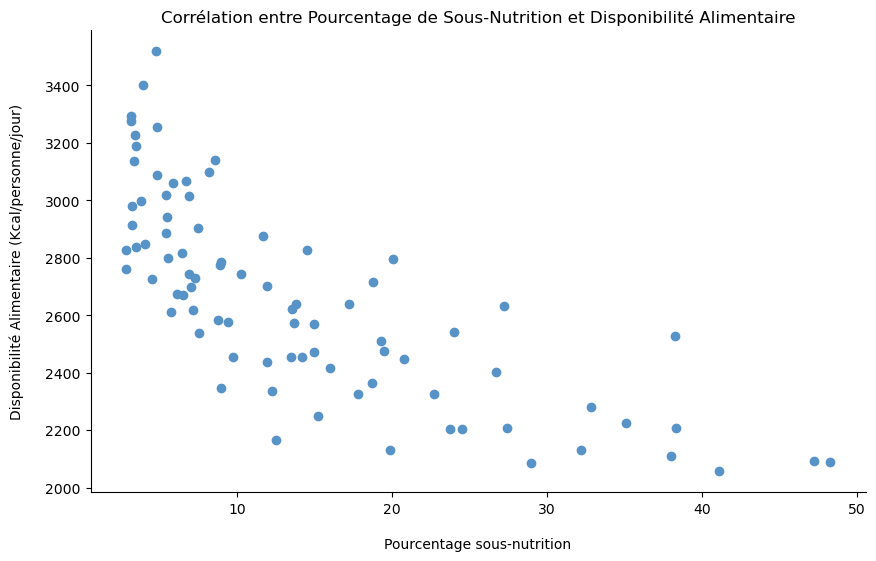

In [80]:
# Créer un graphique en nuage de points montrant la corrélation entre disponibilité alimentaire et sous nutrition
plt.figure(figsize=(10, 6))

plt.scatter(dispo_alimentaire_sous_nutrition['Pourcentage sous-nutrition'], dispo_alimentaire_sous_nutrition['Disponibilité alimentaire (Kcal/personne/jour)'], color='#5893C7')

# Ajouter un titre et des labels aux axes
plt.title("Corrélation entre Pourcentage de Sous-Nutrition et Disponibilité Alimentaire")
plt.xlabel("Pourcentage sous-nutrition", labelpad=15)
plt.ylabel("Disponibilité Alimentaire (Kcal/personne/jour)", labelpad=15) 

# Supprimer les barres noire en haut et à droite
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Afficher le graphique
plt.show()

## Analyse de la Corrélation entre la Sous-Nutrition et la Disponibilité Alimentaire

Le graphique ci-dessus illustre la relation entre le pourcentage de sous-nutrition et la disponibilité alimentaire mesurée en kilocalories par personne et par jour.

### Observations

Une tendance négative claire est observable dans le graphique. À mesure que la disponibilité alimentaire (en Kcal/personne/jour) tend à diminuer, le pourcentage de personne en sous nutrition tend à augmenter. Cela suggère qu'une faible disponibilité alimentaire est souvent associée à des taux plus élevés de sous-nutrition.

En résumé, le graphique met en évidence une relation inverse entre la disponibilité alimentaire et le pourcentage de sous-nutrition, suggérant que l'amélioration de la disponibilité alimentaire pourrait être une voie efficace pour réduire la sous-nutrition mondiale.rition mondiale.
